In [ ]:
# pip install nibabel matplotlib pandas openpyxl

Cargando 101_T1_MRI_SWI_BFC_50mm_HM_sCMB_V1.nii.gz...
Leyendo Excel...
-> Se mostrarán 10 lesiones una por una.
-> CIERRA la ventana de la imagen actual para ver la siguiente.


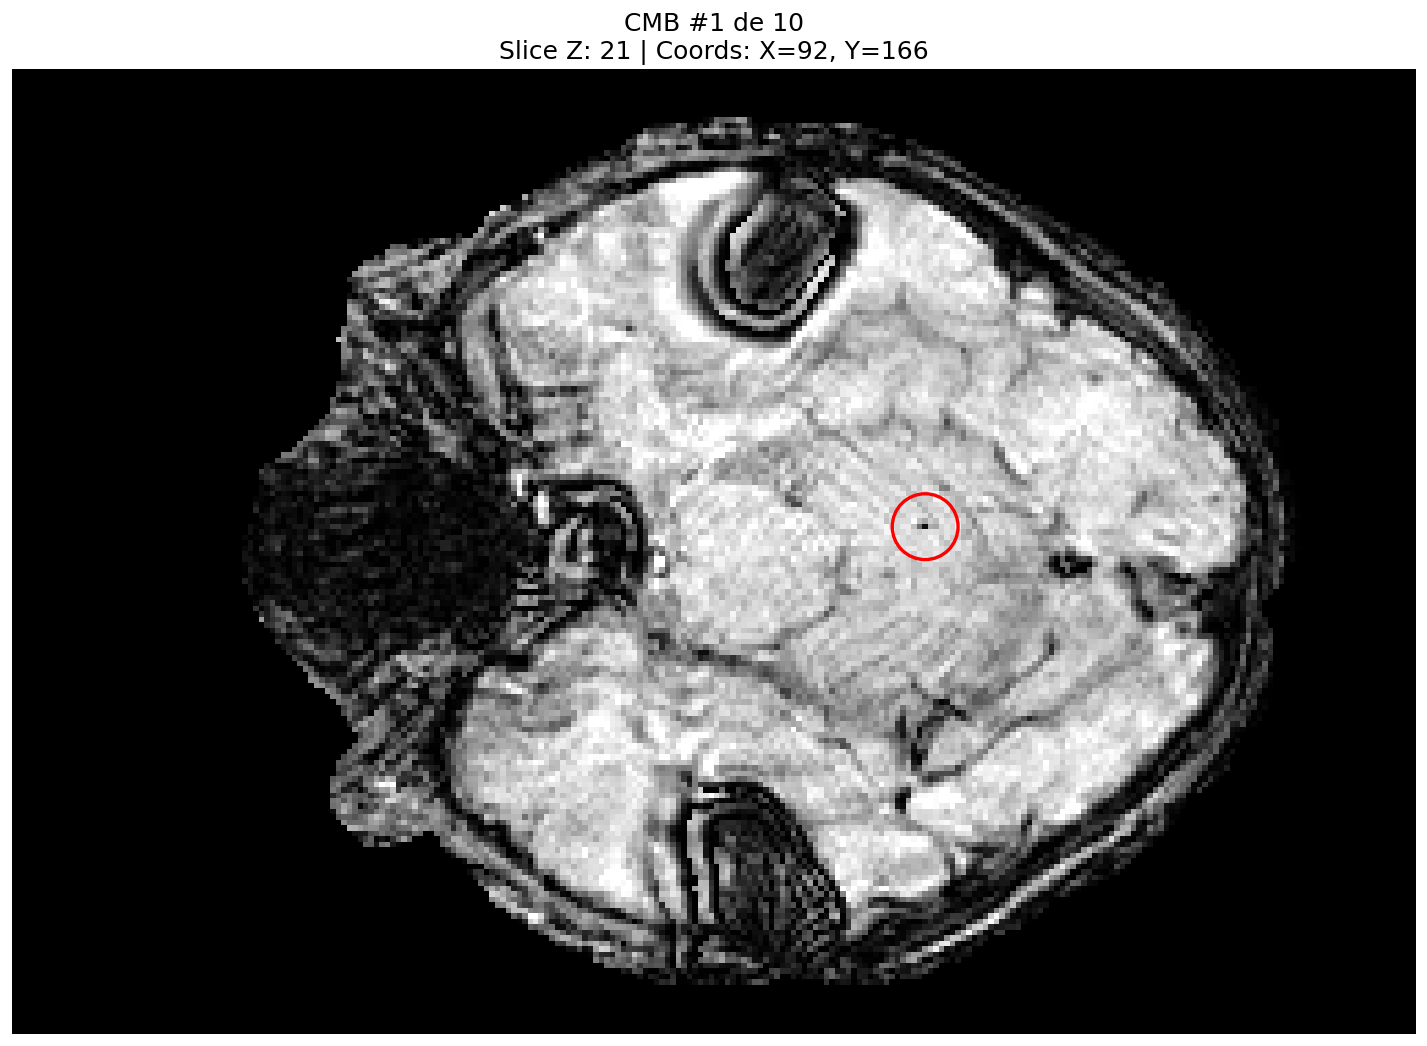

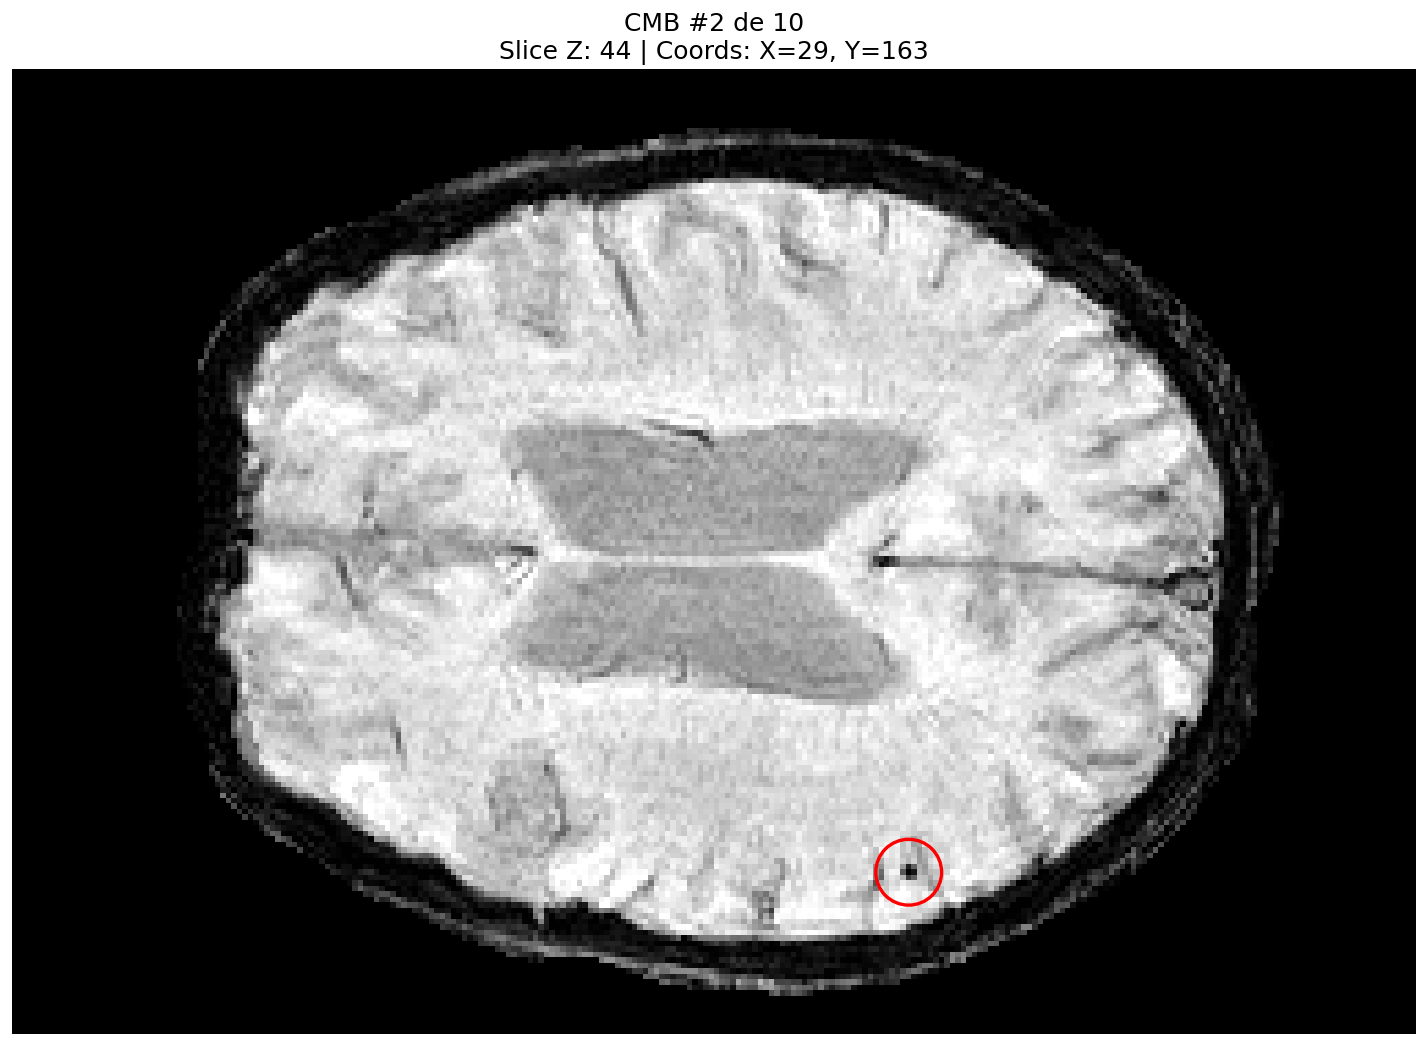

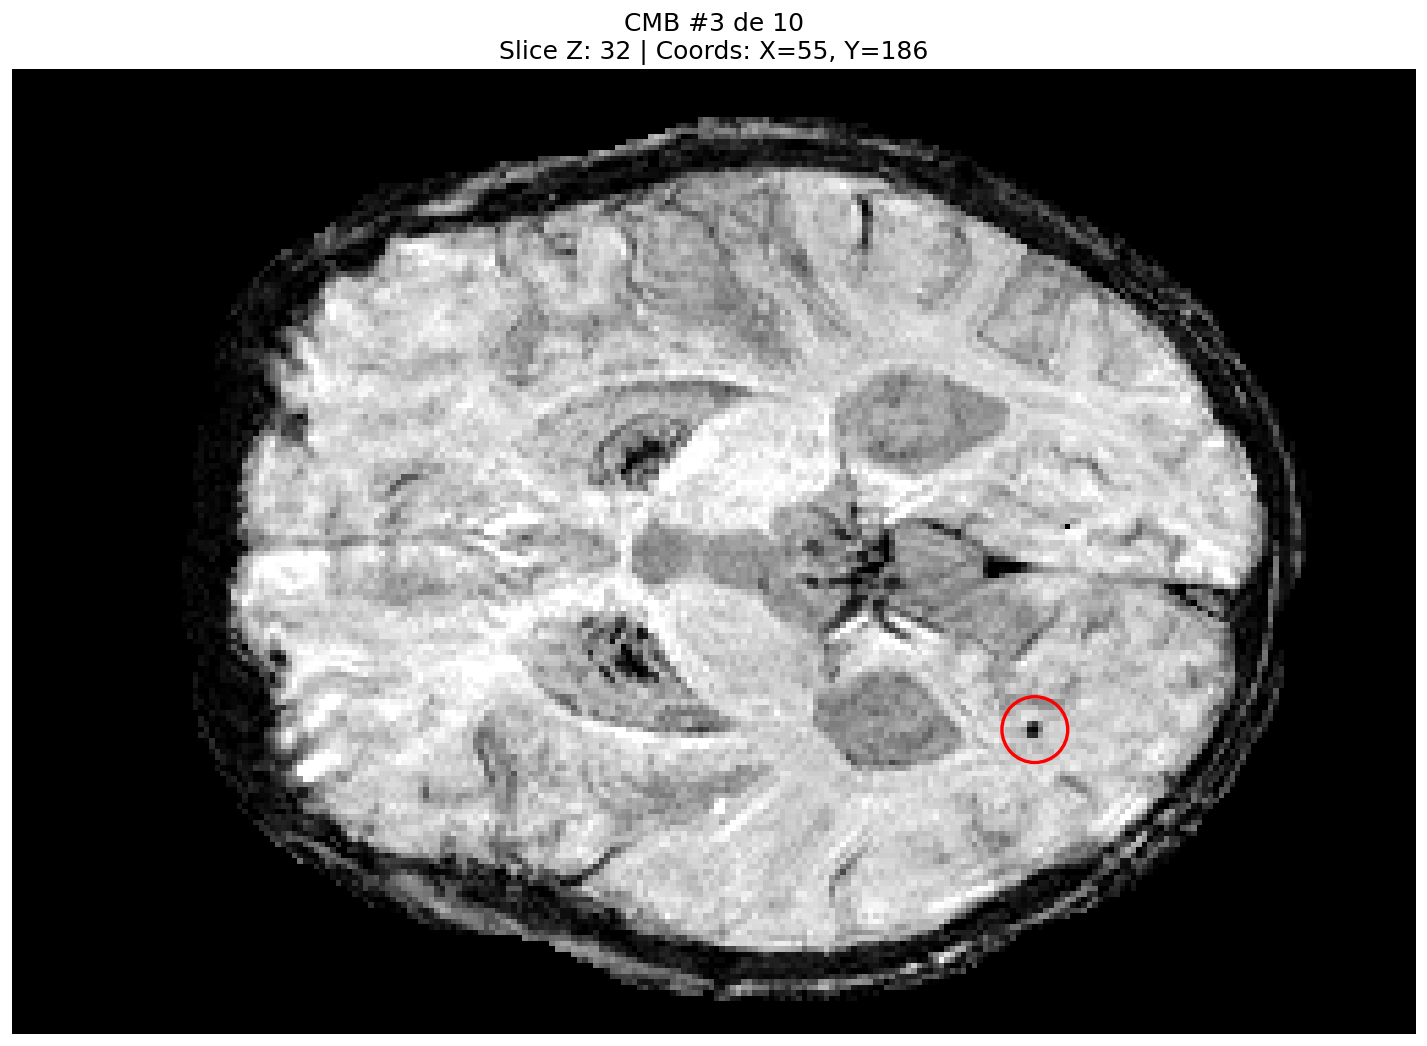

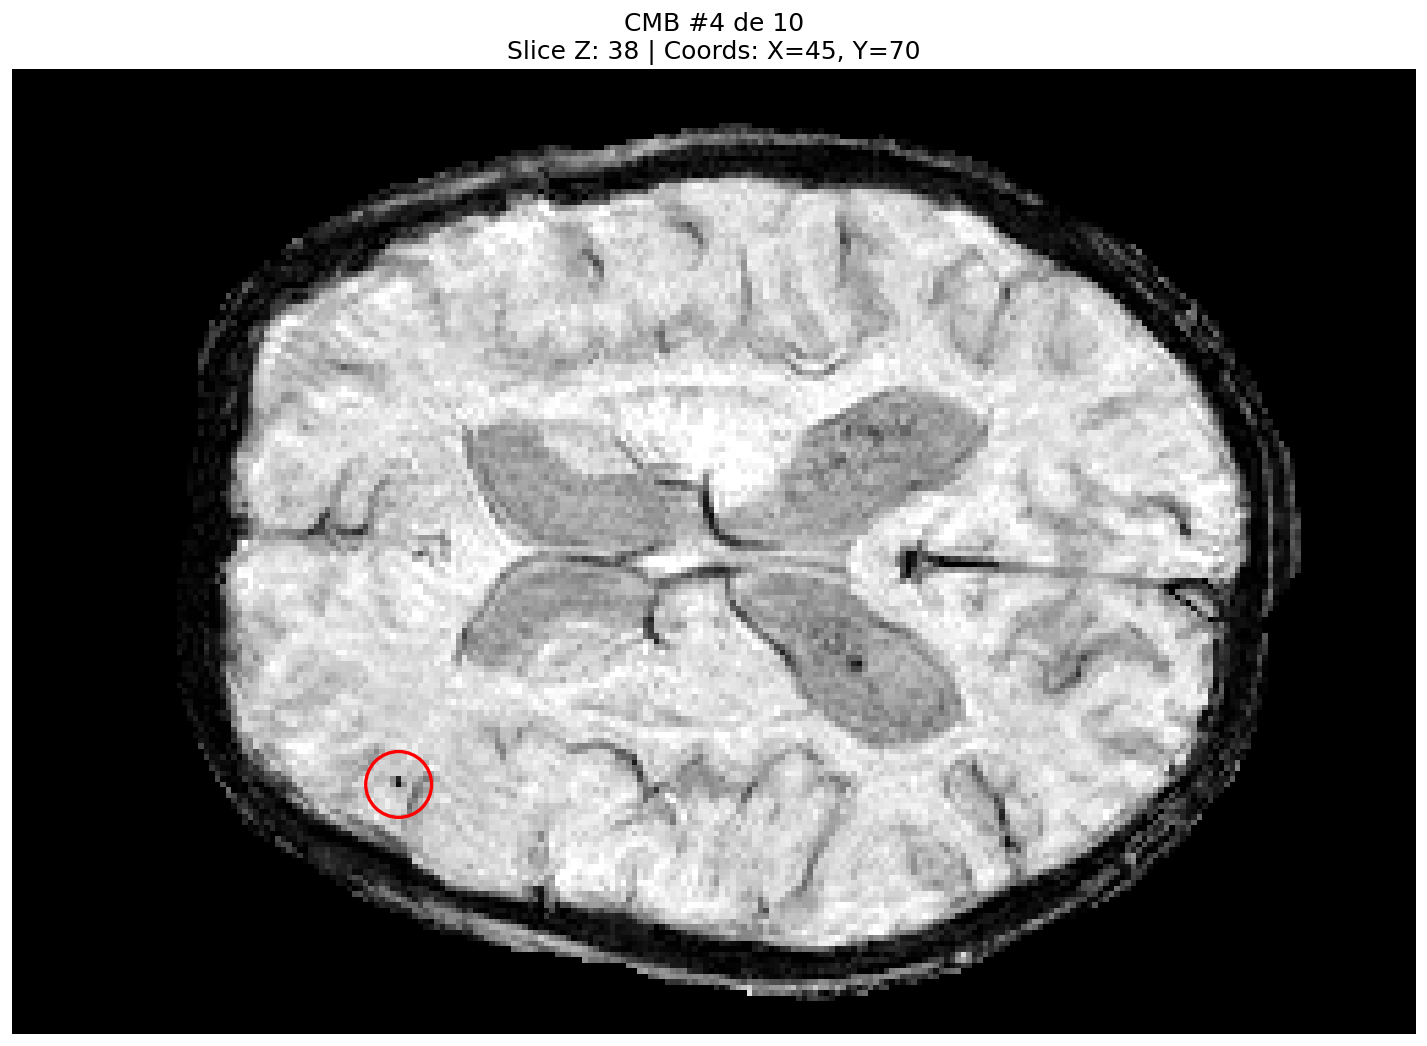

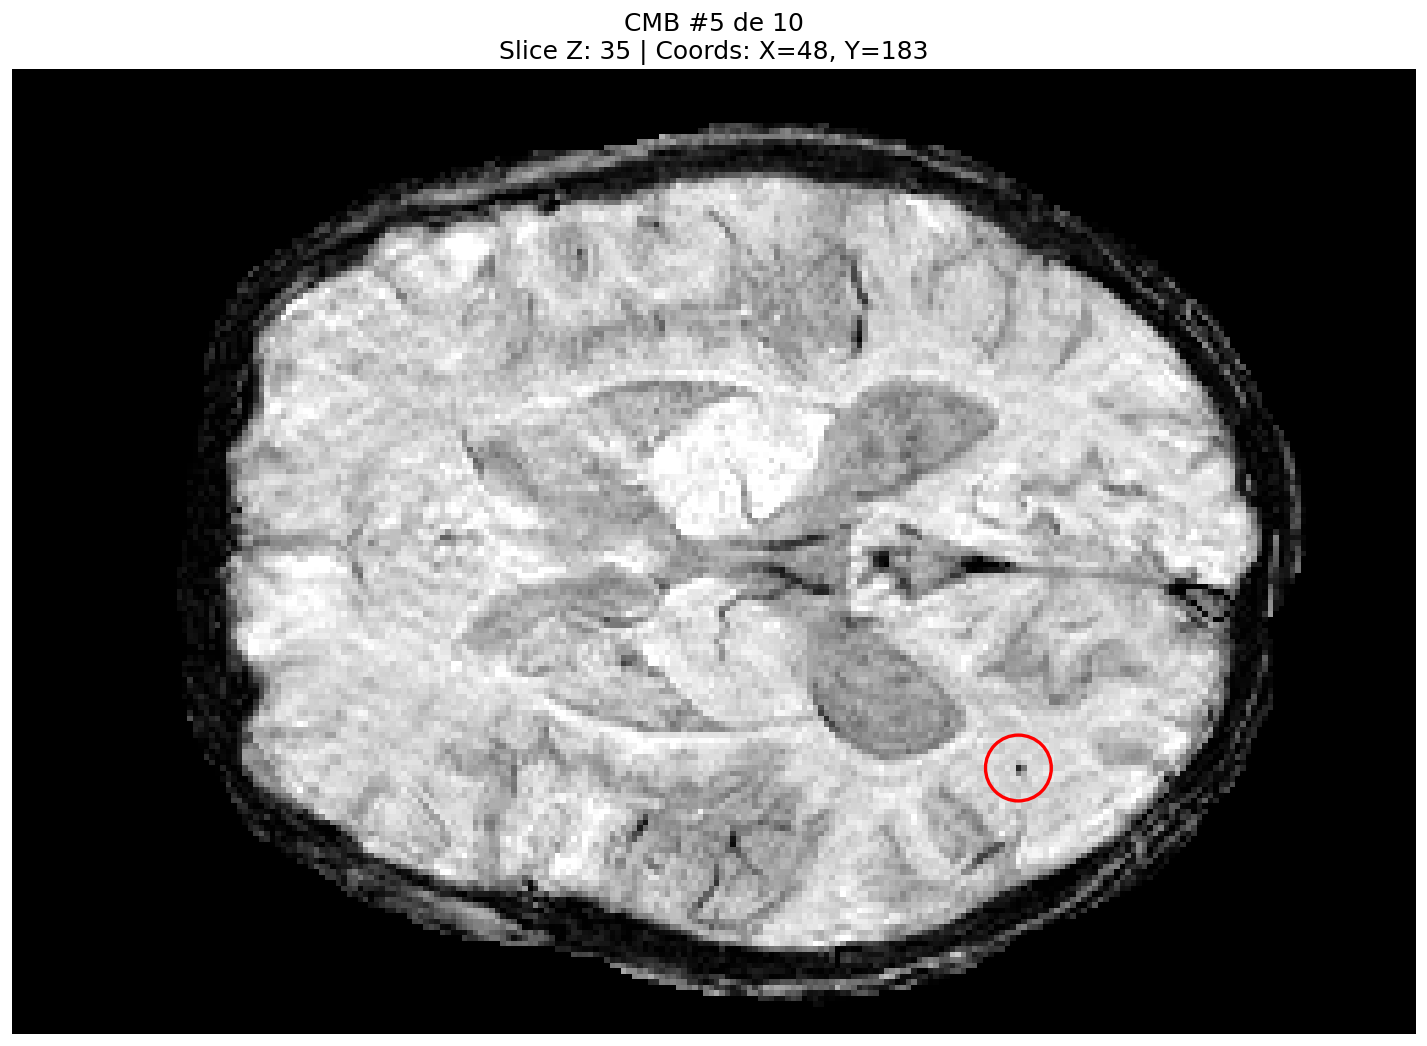

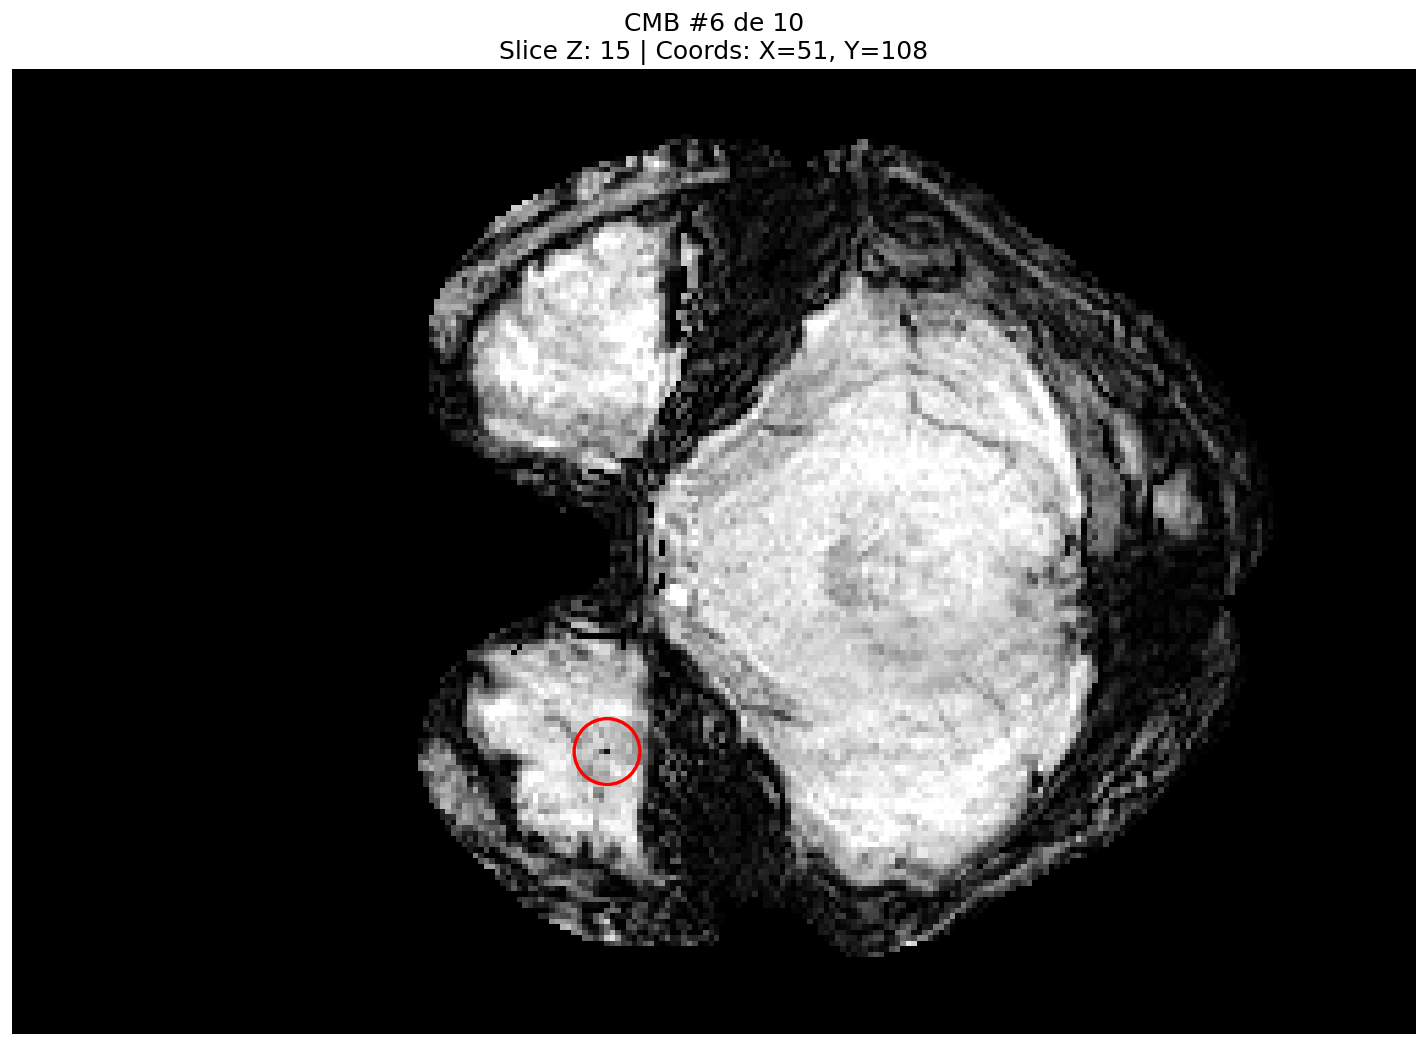

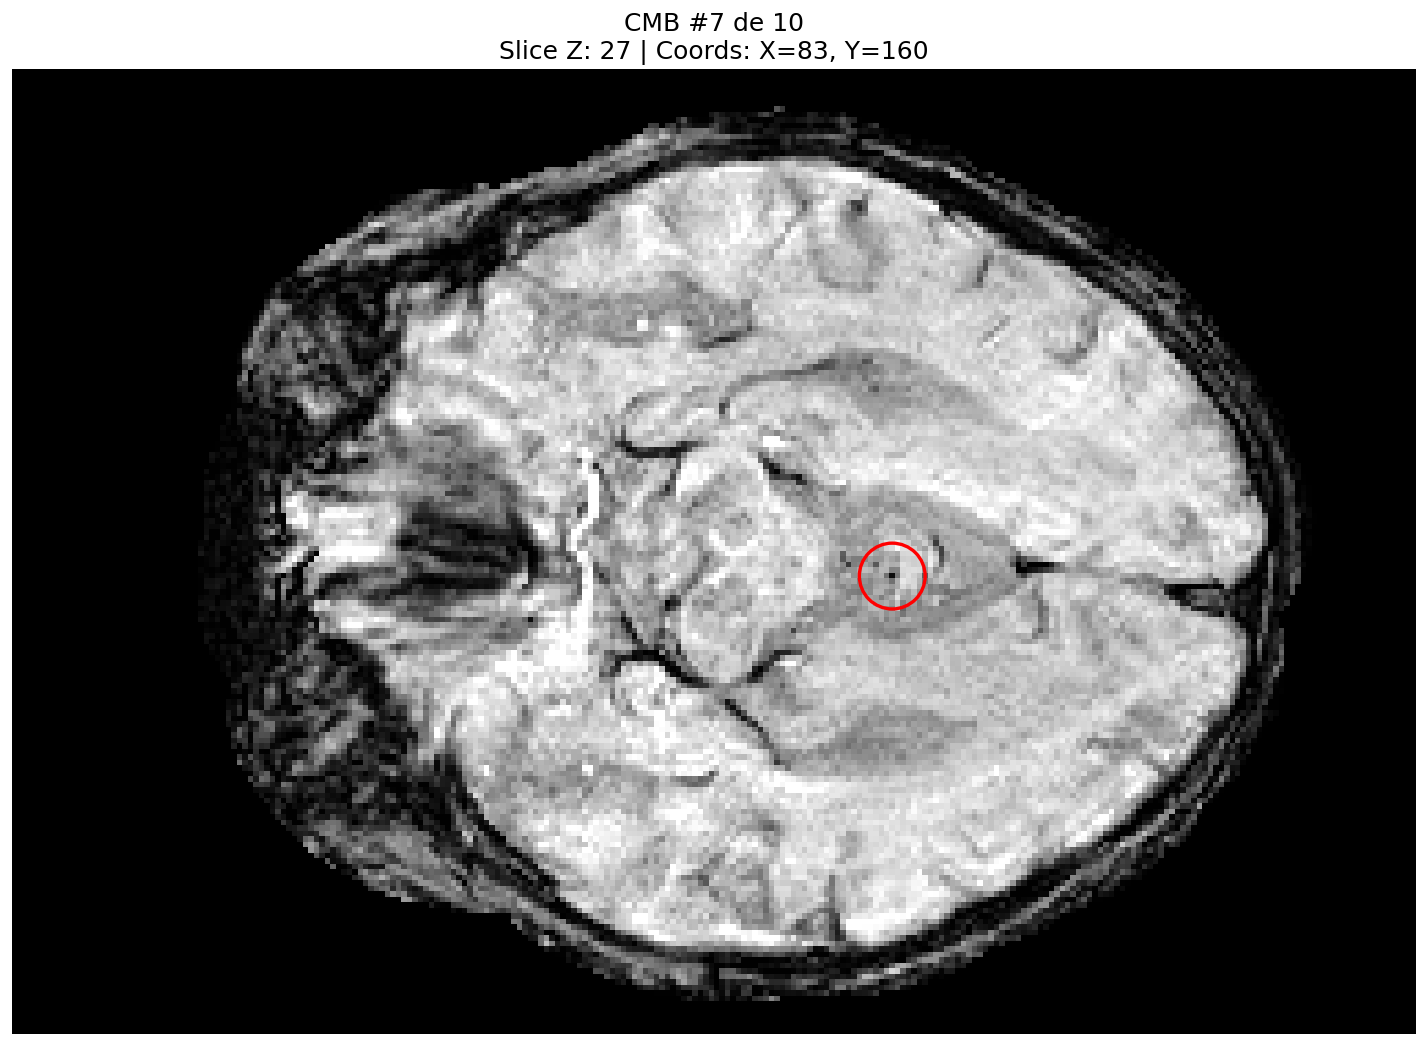

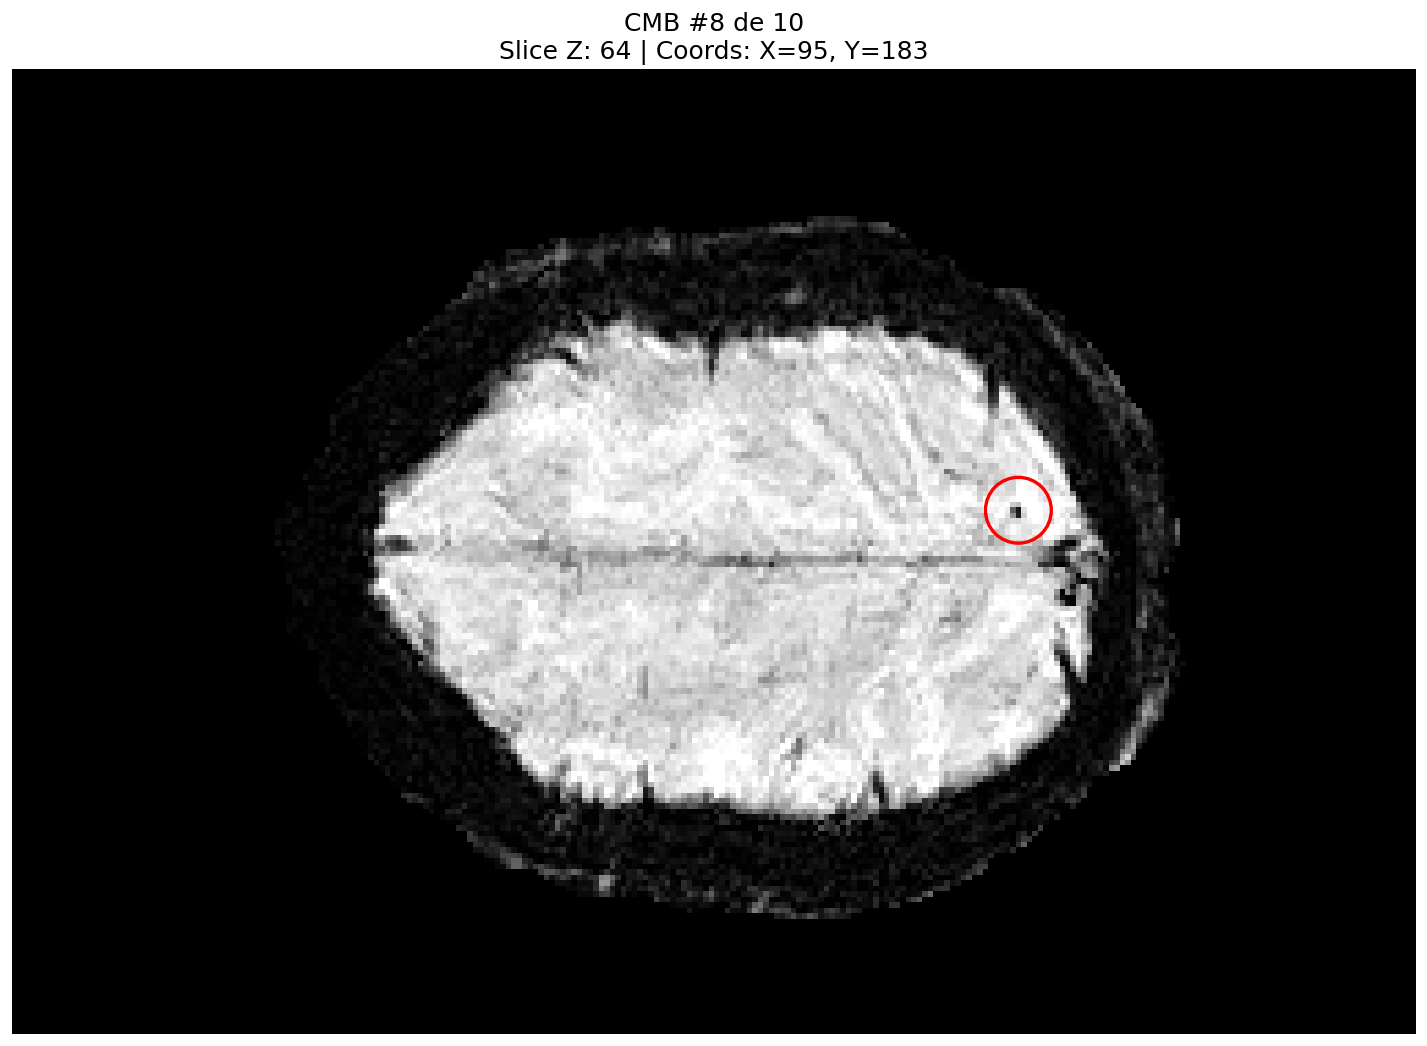

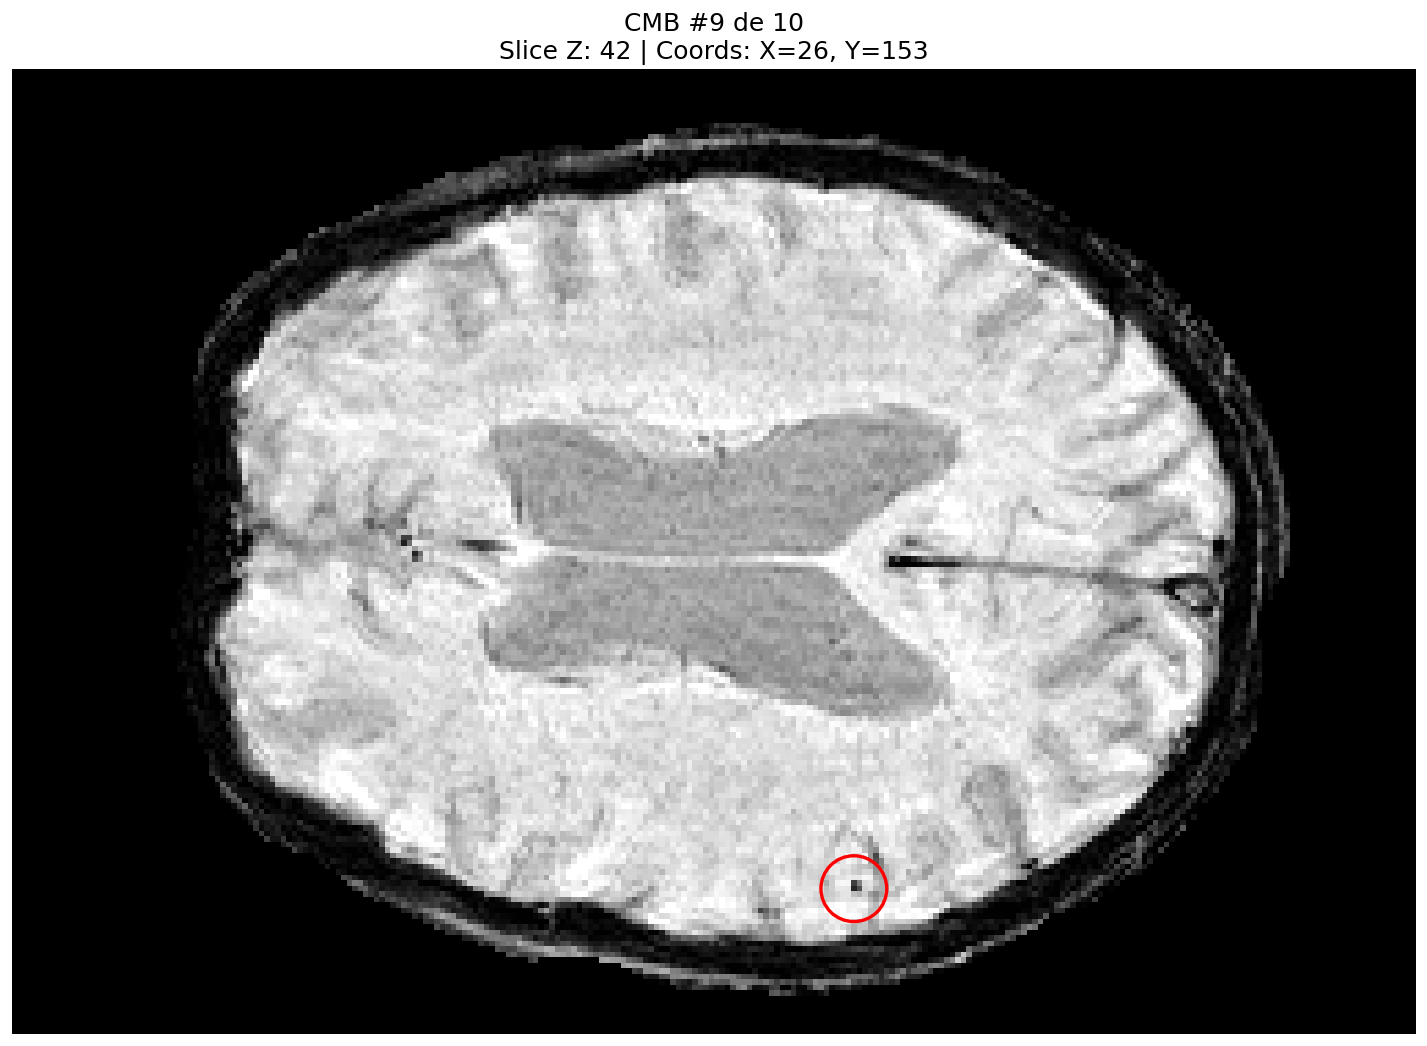

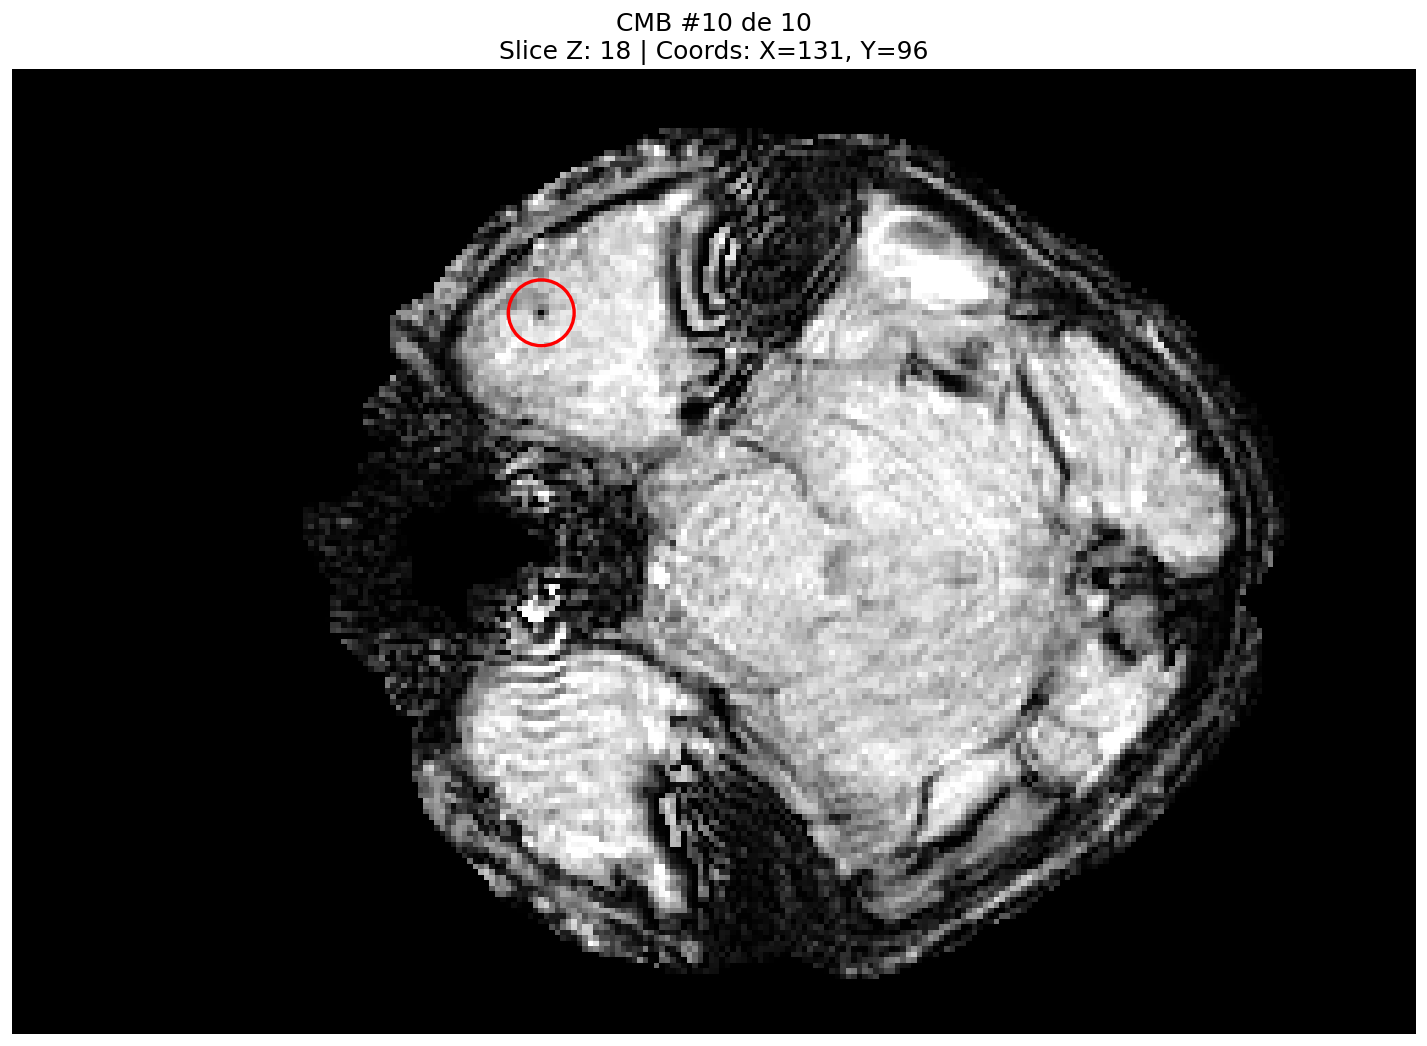

--- Fin de la visualización ---


In [17]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np

# --- RUTAS ---
base_dir = "/media/PORT-DISK/Practicas/MicroBleeds_Generation/momeni2021/"
filename = "101_T1_MRI_SWI_BFC_50mm_HM_sCMB_V1.nii.gz"
nii_path = os.path.join(base_dir, filename)
excel_path = os.path.join(base_dir, "sCMBLocationInformationInfoNocmb.xlsx")

# --- 1. CARGA DE DATOS ---
print(f"Cargando {filename}...")
img = nib.load(nii_path)
data_raw = img.get_fdata()

print("Leyendo Excel...")
df = pd.read_excel(excel_path)
row = df[df.iloc[:, 0].astype(str).str.contains(filename, na=False)]

if row.empty:
    print("ERROR: No encuentro el archivo en el Excel.")
    exit()

values = row.iloc[0, 1:].values
lesiones = []
for i in range(0, len(values), 3):
    if i+2 < len(values) and pd.notna(values[i]):
        #lx, ly, lz = int(values[i]), int(values[i+1]), int(values[i+2])
        # RESTAMOS 1 porque Python cuenta desde 0 y el Excel desde 1
        lx, ly, lz = int(values[i]) - 1, int(values[i+1]) - 1, int(values[i+2]) - 1
        lesiones.append((lx, ly, lz))

print(f"-> Se mostrarán {len(lesiones)} lesiones una por una.")
print("-> CIERRA la ventana de la imagen actual para ver la siguiente.")

# --- 2. BUCLE DE VISUALIZACIÓN ---
for i, (lx, ly, lz) in enumerate(lesiones):
    
    # Preparamos el slice
    # Aseguramos que z no salga del rango
    z_idx = min(lz, data_raw.shape[2] - 1)
    slice_data = data_raw[:, :, z_idx]
    
    # Contraste local para que se vea lo mejor posible
    v_min, v_max = np.percentile(slice_data, 1), np.percentile(slice_data, 99)
    
    # FIGURA GRANDE (figsize=12, 12)
    fig, ax = plt.subplots(figsize=(12, 12), dpi=120)
    
    # Mostrar imagen RAW
    ax.imshow(slice_data, cmap="gray", origin="lower",
              vmin=v_min, vmax=v_max, interpolation='none', aspect='equal')
    
    # DIBUJAR CÍRCULO
    # Coordenadas RAW: Horizontal=ly, Vertical=lx
    circulo = patches.Circle((ly, lx), radius=6, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(circulo)
    
    ax.set_title(f"CMB #{i+1} de {len(lesiones)}\nSlice Z: {z_idx} | Coords: X={lx}, Y={ly}", fontsize=15)
    ax.axis('off')
    
    plt.tight_layout()
    plt.show() # El código se pausa aquí hasta que cierres la ventana
    
print("--- Fin de la visualización ---")